for named colors http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

In [2]:
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pandas import DataFrame
from datetime import datetime,date,timedelta
import seaborn as sns
import os, warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
cityTemp = pd.read_csv('../data/GlobalLandTemperatures/GlobalLandTemperaturesByCity.csv')
cityTemp = cityTemp.dropna()

In [4]:
cityTemp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [5]:
cityTemp['Lat'] = cityTemp['Latitude'].apply(lambda x : float('-'+x[:-1]) if x.find('S')> -1 else float(x[:-1]))
cityTemp['Lon'] = cityTemp['Longitude'].apply(lambda x : float('-'+x[:-1]) if x.find('W')> -1 else float(x[:-1]))

In [6]:
cityTempAvg = cityTemp.groupby('City').mean().reset_index(drop=False)
cityTempAvg.head()

,City,AverageTemperature,AverageTemperatureUncertainty,Lat,Lon
0,A Coruña,13.147277,1.487352,42.59,-8.73
1,Aachen,8.825173,1.617299,50.63,6.34
2,Aalborg,7.695135,1.668720,57.05,10.33
3,Aba,26.612824,0.644945,5.63,8.07
4,Abadan,25.034749,0.953450,29.74,48.00


In [7]:
lat = cityTempAvg['Lat'].values
lon = cityTempAvg['Lon'].values
temp = cityTempAvg['AverageTemperature'].values

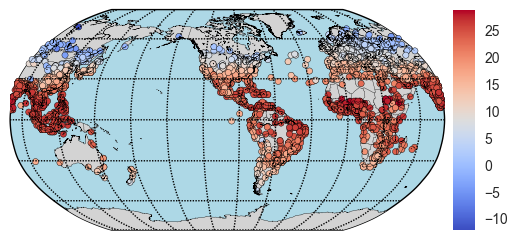

In [13]:
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
amap = Basemap(projection='robin',lat_0=0,lon_0=-100,resolution='l')

amap.drawmapboundary(fill_color='lightblue')
# draw coastlines, country boundaries, fill continents.
amap.drawcoastlines(linewidth=0.25)
amap.drawcountries(linewidth=0.25)
amap.fillcontinents(color='lightgrey',zorder=0)

amap.drawmeridians(np.arange(0, 360, 30))
amap.drawparallels(np.arange(-90, 90, 30))

x,y = amap(lon, lat)
amap.scatter(x, y, c=temp, cmap='coolwarm')
# cbar = amap.colorbar(cax, ticks=[-1, 0, 1], orientation='horizontal')
amap.colorbar()
plt.show()